#Q6

#### Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

#### Importing the dataset

In [4]:
df = pd.read_csv('ECG.csv')
print(df.head())
value_counts = df['label'].value_counts()
print(value_counts)

   Unnamed: 0 label  feat1       feat2       feat3      feat4       feat5  \
0           0     O      5  661.190476  658.333333  55.278736  106.962730   
1           1     O      5  661.666667  658.333333  56.579873  108.407273   
2           2     O      8  661.904762  660.000000  58.758004  112.796617   
3           3     O      7  660.952381  663.333333  59.029597  113.649634   
4           4     O      5  660.476191  663.333333  55.759820  107.623910   

        feat6  feat7     feat8  ...   feat160  feat161   feat162   feat163  \
0  111.113889     13  0.928571  ...  0.165551    0.196  0.321645  0.074160   
1  112.510209     13  0.928571  ...  0.190431    0.196  0.362420  0.085271   
2  117.091412     13  0.928571  ...  0.094497    0.316  0.376645  0.042448   
3  117.981601     13  0.928571  ...  0.157149    0.284  0.419043  0.070674   
4  111.732026     13  0.928571  ...  0.162662    0.204  0.354123  0.072988   

    feat164   feat165   feat166   feat167  feat168  feat169  
0  0.0

####Ploting dataset

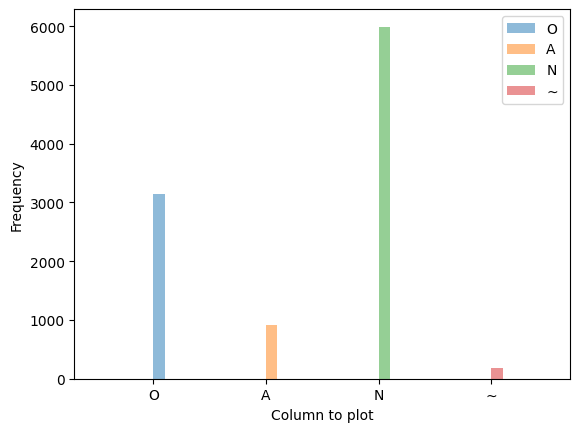

In [5]:
for value in df['label'].unique():
    subset = df[df['label'] == value]
    plt.hist(subset['label'], bins=10, alpha=0.5, label=value)


plt.xlabel('Column to plot')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()

####Spilit data

In [6]:
# Split the data into training and testing sets
X = df.drop(df.columns[0], axis=1)
X =  X.drop('label', axis=1)
# print(X)
y = df['label']

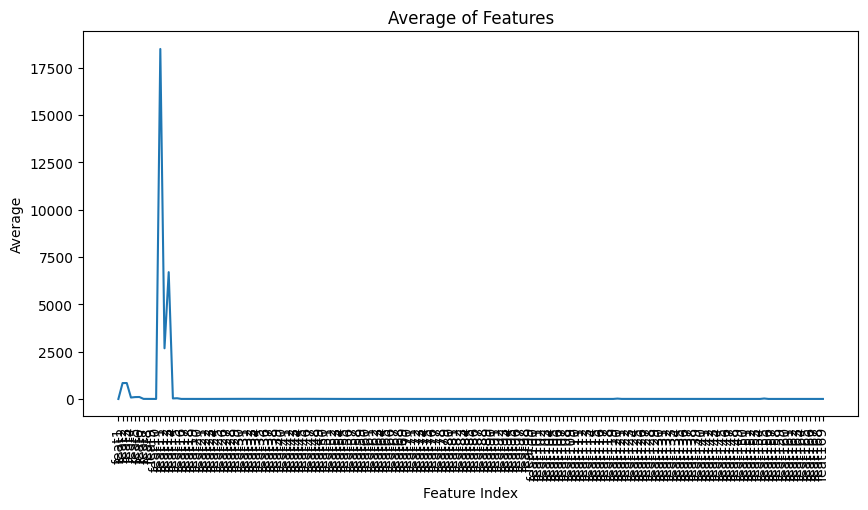

In [28]:
feature_means = np.mean(X, axis=0)

plt.figure(figsize=(10,5))
plt.plot(feature_means)
plt.xlabel('Feature Index')
plt.ylabel('Average')
plt.title('Average of Features')
plt.xticks(rotation=90)

plt.show()

##without normalization

spilit data set

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.1, random_state=42)

####MLP wth 4 layer

In [8]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(128,64,32,16), 
                    random_state=1)

clf.fit(train_data, train_labels) 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128, 64, 32, 16), random_state=1,
              solver='lbfgs')

result

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predictions_train = clf.predict(train_data)
predictions_test = clf.predict(test_data)
print(classification_report( test_labels,predictions_test))
print(confusion_matrix( test_labels,predictions_test))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        98
           N       0.58      1.00      0.73       590
           O       0.00      0.00      0.00       321
           ~       0.00      0.00      0.00        17

    accuracy                           0.58      1026
   macro avg       0.14      0.25      0.18      1026
weighted avg       0.33      0.58      0.42      1026

[[  0  98   0   0]
 [  0 590   0   0]
 [  0 321   0   0]
 [  0  17   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##with normalization

spilit data set

In [10]:


train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.1, random_state=42)

#### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data_scaled = sc.fit_transform(train_data)
test_data_scaled = sc.transform(test_data)

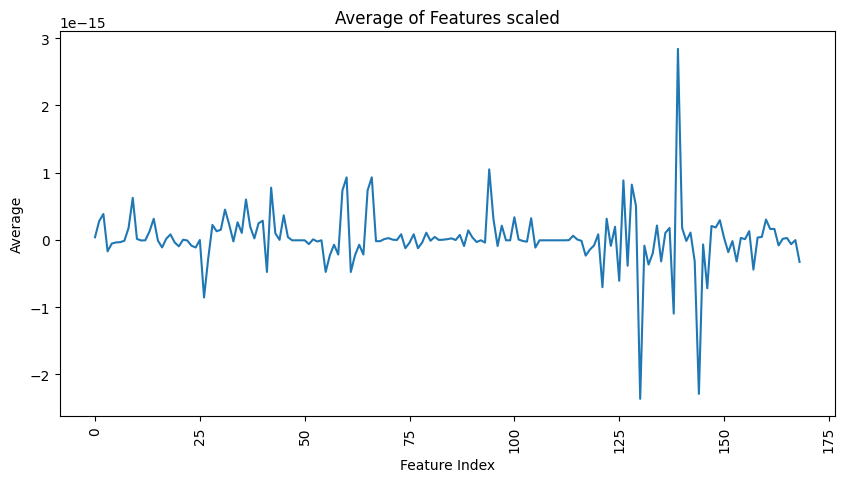

In [30]:
feature_means = np.mean(train_data_scaled, axis=0)

plt.figure(figsize=(10,5))
plt.plot(feature_means)
plt.xlabel('Feature Index')
plt.ylabel('Average')
plt.title('Average of Features scaled')
plt.xticks(rotation=90)

plt.show()

####MLP wth 4 layer

In [12]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(128,64,32,16), 
                    random_state=1)

clf.fit(train_data_scaled, train_labels) 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128, 64, 32, 16), random_state=1,
              solver='lbfgs')

result

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predictions_train_scaled = clf.predict(train_data_scaled)
predictions_test_scaled = clf.predict(test_data_scaled)
print(classification_report( test_labels,predictions_test_scaled))
print(confusion_matrix( test_labels,predictions_test_scaled))

              precision    recall  f1-score   support

           A       0.86      0.85      0.85        98
           N       0.89      0.90      0.90       590
           O       0.81      0.80      0.80       321
           ~       0.42      0.47      0.44        17

    accuracy                           0.85      1026
   macro avg       0.74      0.75      0.75      1026
weighted avg       0.85      0.85      0.85      1026

[[ 83   6   8   1]
 [  3 529  52   6]
 [ 10  51 256   4]
 [  1   6   2   8]]


##part ve

In [14]:
df_ve = df[df['label'] != '~']
value_counts = df_ve['label'].value_counts()
print(value_counts)
df_ve.loc[df_ve['label'] == 'A', 'label'] = 'O'
value_counts = df_ve['label'].value_counts()
print(value_counts)


N    5992
O    3151
A     923
Name: label, dtype: int64
N    5992
O    4074
Name: label, dtype: int64


spilit data set

In [15]:
# Split the data into training and testing sets
X = df_ve.drop(df_ve.columns[0], axis=1)
X =  X.drop('label', axis=1)
# print(X)
y = df_ve['label']

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.1, random_state=42)

#### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data_scaled = sc.fit_transform(train_data)
test_data_scaled = sc.transform(test_data)

####MLP wth 4 layer

In [17]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(128,64,32,16), 
                    random_state=1)

clf.fit(train_data_scaled, train_labels) 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128, 64, 32, 16), random_state=1,
              solver='lbfgs')

result

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predictions_train_scaled = clf.predict(train_data_scaled)
predictions_test_scaled = clf.predict(test_data_scaled)
print(classification_report( test_labels,predictions_test_scaled))
print(confusion_matrix( test_labels,predictions_test_scaled))

              precision    recall  f1-score   support

           N       0.92      0.92      0.92       608
           O       0.88      0.87      0.88       399

    accuracy                           0.90      1007
   macro avg       0.90      0.90      0.90      1007
weighted avg       0.90      0.90      0.90      1007

[[560  48]
 [ 51 348]]
